In [1]:
import os 

%matplotlib inline
from pylab import *
import matplotlib.pyplot as plt


In [2]:
import pyAgrum as gum
import pyAgrum.lib.notebook as gnb

bn=gum.loadBN(os.path.join("res","Diabetes.bif"))
#gnb.showBN(bn,size='8')
print(bn)



BN{nodes: 413, arcs: 602, domainSize: 10^406.108, parameters: 461069, compression ratio: 100-10^-398.444% }


### First, some helpers

In [3]:
import time

class Timer:    
    def __enter__(self):
        self.start = time.clock()
        return self

    def __exit__(self, *args):
        self.end = time.clock()
        self.duration = self.end - self.start
        
        

In [4]:
def execute(ie):
    with Timer() as t:
        ie.makeInference()
        for i in bn.ids():
            a=ie.posterior(i)
    return "duration : {:3.3f}s".format(t.duration)
    
def vals(bn,ie):
    exact=[]
    appro=[]
    for node in bn.ids():
        # potentials as numpy array
        exact+=ie.posterior(node).tolist()

    return exact
    
    

### Exact inference.

In [5]:
plt.rcParams["figure.figsize"] = [25,3]

def compareIE(bn,maxtime,epsilon,evs=None):
    ie=gum.LazyPropagation(bn)
    if evs is not None:
        ie.setEvidence(evs)
    txt="Lazy : "+execute(ie)
    x=vals(bn,ie)
    y=vals(bn,ie)
    plt.subplot(161)
    plt.plot(x,y,'ro')
    plt.title(txt)

    ie2=gum.GibbsSampling(bn)
    if evs is not None:
        ie2.setEvidence(evs)
    ie2.setMaxTime(maxtime)
    ie2.setEpsilon(epsilon)
    txt="Gibbs : "+execute(ie2)+"\n"+ie2.messageApproximationScheme()
    y=vals(bn,ie2)
    plt.subplot(162)
    plt.plot(x,y,'ro')
    plt.title(txt)

    ie3=gum.MonteCarloSampling(bn)
    if evs is not None:
        ie3.setEvidence(evs)
    ie3.setMaxTime(maxtime)
    ie3.setEpsilon(epsilon)
    txt="MonteCarlo : "+execute(ie3)+"\n"+ie3.messageApproximationScheme()
    y=vals(bn,ie3)
    plt.subplot(163)
    plt.plot(x,y,'ro')
    plt.title(txt)

    ie4=gum.WeightedSampling(bn)
    if evs is not None:
        ie4.setEvidence(evs)
    ie4.setMaxTime(maxtime)
    ie4.setEpsilon(epsilon)
    txt="Weighted : "+execute(ie4)+"\n"+ie4.messageApproximationScheme()
    y=vals(bn,ie4)
    plt.subplot(164)
    plt.plot(x,y,'ro')
    plt.title(txt)

    ie5=gum.ImportanceSampling(bn)
    if evs is not None:
        ie5.setEvidence(evs)
    ie5.setMaxTime(maxtime)
    ie5.setEpsilon(epsilon)
    txt="Importance: "+execute(ie5)+"\n"+ie5.messageApproximationScheme()
    y=vals(bn,ie5)
    plt.subplot(165)
    plt.plot(x,y,'ro')
    plt.title(txt)

    ie6=gum.LoopyBeliefPropagation(bn)
    if evs is not None:
        ie6.setEvidence(evs)
    ie6.setMaxTime(maxtime)
    ie6.setEpsilon(epsilon)
    txt="LBP: "+execute(ie6)+"\n"+ie6.messageApproximationScheme()
    y=vals(bn,ie6)
    plt.subplot(166)
    plt.plot(x,y,'ro')
    plt.title(txt)
    plt.show()


In [ ]:
compareIE(bn,5,1e-2)

In [ ]:
compareIE(bn,50,1e-2)

In [ ]:
print(bn.variable(bn.topologicalOrder()[-1]).name())
print(bn.variable(bn.topologicalOrder()[-10]).name())
print(bn.variable(bn.topologicalOrder()[-100]).name())

In [ ]:
ie=gum.LazyPropagation(bn)
ie.setEvidence({'bg_24':0})
ie.makeInference()
gnb.sideBySide(ie.posterior("bg_24"),ie.posterior(409))

UndefinedElement: /home/phw/Documents/gits/lip6/aGrUM-dev/wrappers/pyAgrum/../../src/agrum/BN/inference/tools/marginalTargetedInference_tpl.h:80: 246 is not a NodeId in the bn

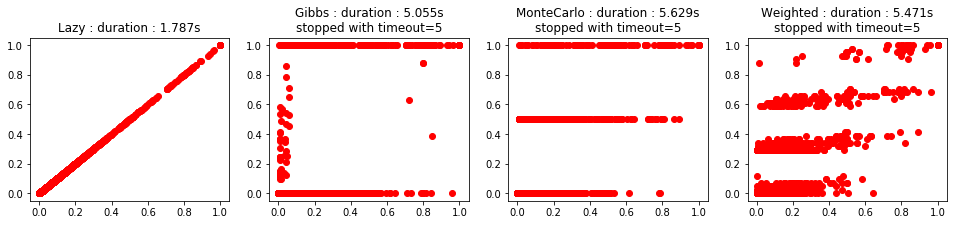

In [6]:
compareIE(bn,5,1e-2,evs={'bg_24':0,'ins_indep_util_23':1,'renal_cl_14':1})

<h1>Loopy Belief Propagation</h1>

Like other approximated algorithm (GibbsInference), Loopy belief propagations inference iterations can be stopped :
<ul>
<li> by the value of error (epsilon)</li>
<li> by the rate of change of epsilon (MinEpsilonRate)</li>
<li> by the number of iteration (MaxIteration)</li>
<li> by the duration of the algorithm (MaxTime)</li>
</ul>

In [ ]:
ie2=gum.LoopyBeliefPropagation(bn)
execute(ie2)
print(ie2.messageApproximationScheme())
compare(ie,ie2)



<H1>GIBBS vs LBP</H1>

Let's try a Gibbs Inference with the same amount of time :

In [ ]:
ie2=gum.GibbsInference(bn)
ie2.setMaxTime(1)
execute(ie2)
print(ie2.messageApproximationScheme())
compare(ie,ie2)



In [ ]:
ie2=gum.ImportanceSampling(bn)
ie2.setMaxTime(1)
execute(ie2)
print(ie2.messageApproximationScheme())
compare(ie,ie2)



<H2>More time for Gibbs</H2>

In [ ]:
ie2=gum.GibbsInference(bn)
ie2.setMaxTime(120)
execute(ie2)
print(ie2.messageApproximationScheme())
compare(ie,ie2)



In [ ]:
ie2=gum.ImportanceSampling(bn)
ie2.setMaxTime(120)
execute(ie2)
print(ie2.messageApproximationScheme())
compare(ie,ie2)


In [ ]:
print(bn.parents(bn.idFromName("bg_24")))

In [ ]:
bn.cpt("bg_24")

In [ ]:
ie=gum.LazyPropagation(bn)
ie.makeInference()
ie.posterior("bg_24")